In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Default Gauss-Newton Method

In [2]:
# Default Gauss-Newton Method
from numpy import linalg as la
def GN(Fx, Jac, x, y, beta0, maxiter = 100, tol = 1e-3):
    bet = beta0
    err  = 0
    for t in range(0, maxiter):
        Ft  = Fx(x, y, bet)
        Jt  = Jac(x, bet)
        St  = la.pinv( Jt.dot(Jt.T) )
        yt  = Jt.dot(Ft).T
        dt  = np.ravel(St.dot(yt))
        bet = bet - dt
        err = la.norm(yt)
        print("Iteration: {0:2d}".format(t), "-- Error: {0:5.4e}".format(err))
        if err <= tol:
            print(">>> Convergence achieved!")
            break
    return bet, err, t

## Fitting

### Prepare some data

In [3]:
x_train = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,\
                    4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8])
y_train = np.array([0.169, 0.164, 0.210, 0.215, 0.183, 0.181, 0.188, 0.229,\
                    0.268, 0.202, 0.193, 0.262, 0.215, 0.285, 0.313, 0.222, 0.225,\
                    0.326, 0.283, 0.374, 0.406, 0.304, 0.284, 0.463, 0.456, 0.598, 0.618,\
                    0.475, 0.425, 0.554, 0.810, 1.011, 0.999, 0.751, 0.742, 1.273, 1.300,\
                    1.612, 1.588, 1.225, 1.208])

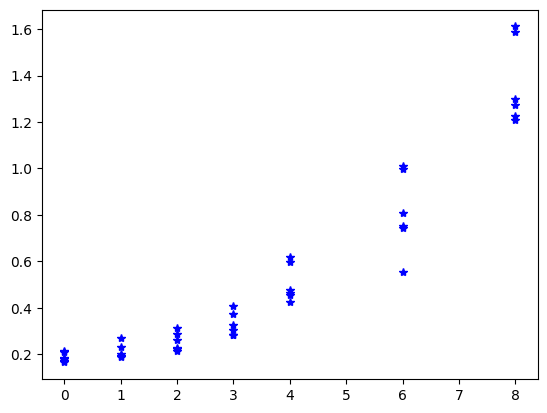

In [4]:
plt.plot(x_train, y_train, 'b*', label='data')

### Model Definition

In [5]:
# Define the function and its Jacobian mapping.
# Define the model
def my_model(x, b0, b1):
    return b0*np.exp(x/b1)

def Fval(x, y, beta):
    return my_model(x, beta[0], beta[1]) - y

def Jac(x, beta):
    return np.array([np.exp(x/beta[1]), -(beta[0]/beta[1]**2)*np.exp(x/beta[1])*x ])

### Fitting

In [6]:
# We run it.
beta0 = [1, 2]
beta_best, err, n_it = GN(Fval, Jac, x_train, y_train, beta0)
print("\nParameters:", beta_best, "\nError: ", err, "\nNumber of Iterations: ", n_it)

Iteration:  0 -- Error: 4.3734e+04
Iteration:  1 -- Error: 1.3142e+03
Iteration:  2 -- Error: 2.6061e+02
Iteration:  3 -- Error: 5.1467e+01
Iteration:  4 -- Error: 9.8034e+00
Iteration:  5 -- Error: 9.5526e-01
Iteration:  6 -- Error: 1.1868e-02
Iteration:  7 -- Error: 1.4007e-06
>>> Convergence achieved!

Parameters: [0.16372089 3.76453933] 
Error:  1.400680826889285e-06 
Number of Iterations:  7


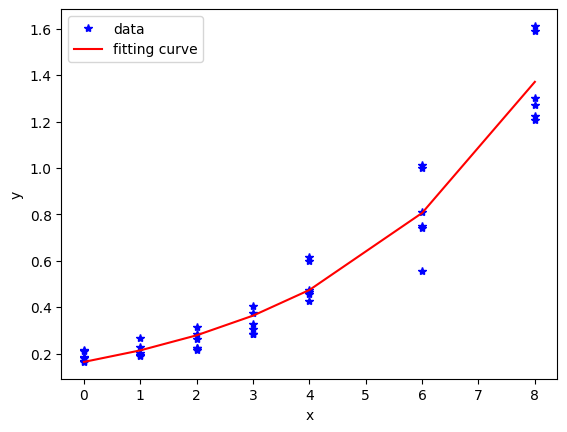

In [7]:
plt.plot(x_train, y_train, 'b*', label='data')
plt.plot(x_train, my_model(x_train, *beta_best), 'r-', label='fitting curve' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()